In [1]:
import tensorflow as tf
import tensorflow.contrib.keras.api.keras as K
import numpy as np 
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
# Step 1: Load dataset
num_classes = 10
digits = load_digits(n_class=num_classes)
x = digits.data
y = digits.target
n_samples, n_features = x.shape

print("data shape: ",x.shape)
print("class shape: ",y.shape)

# Split the data into training and testing sets
N_train = int(0.8 * x.shape[0])
x_train = x[:N_train,:]
y_train = y[:N_train]
x_test = x[N_train:,:]
y_test = y[N_train:]

# Convert labels to one-hot vector
y_train_onehot = np.zeros((len(y_train),num_classes))
for indx in range(len(y_train)):
    y_train_onehot[indx,y_train[indx]] = 1
y_test_onehot = np.zeros((len(y_test),num_classes))
for indx in range(len(y_test)):
    y_test_onehot[indx,y_test[indx]] = 1

print("train label shape: ", y_train_onehot.shape)
print("test label shape: ", y_test_onehot.shape)

data shape:  (1797, 64)
class shape:  (1797,)
train label shape:  (1437, 10)
test label shape:  (360, 10)


In [3]:
# Step 2: Build a neural network model to classify the digits

# First, define the based sequential model
model = K.models.Sequential()

# Add the first fully connected layer
# As this is the first layer in your model, don't forget to include the 'input_dim' argument
model.add(K.layers.Dense(10, input_dim = x.shape[1]))

# Add 'relu' activation layer
model.add(K.layers.Activation('relu'))

# Add the second fully connected layer with 10 hidden units 
# (each hidden unit corresponds to one class, i.e. digit):
model.add(K.layers.Dense(10))

# Add 'softmax' activation layer to transform the score into class probabilities 
model.add(K.layers.Activation('softmax'))

# Compile the model with 'categorical_crossentropy' loss function and 
# 'sgd' optimizer
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
# Step 3: Train the model
model.fit(x_train, y_train_onehot, epochs=30, batch_size=32)

Epoch 1/30
1437/1437 [==============================] - 0s 129us/step - loss: 2.5098 - acc: 0.2832
Epoch 2/30
1437/1437 [==============================] - 0s 52us/step - loss: 1.6223 - acc: 0.4322
Epoch 3/30
1437/1437 [==============================] - 0s 67us/step - loss: 1.3567 - acc: 0.5101
Epoch 4/30
1437/1437 [==============================] - 0s 64us/step - loss: 1.1511 - acc: 0.5915
Epoch 5/30
1437/1437 [==============================] - 0s 65us/step - loss: 0.9621 - acc: 0.6896
Epoch 6/30
1437/1437 [==============================] - 0s 57us/step - loss: 0.8106 - acc: 0.7328
Epoch 7/30
1437/1437 [==============================] - 0s 61us/step - loss: 0.7049 - acc: 0.7627
Epoch 8/30
1437/1437 [==============================] - 0s 61us/step - loss: 0.6241 - acc: 0.7850
Epoch 9/30
1437/1437 [==============================] - 0s 58us/step - loss: 0.5755 - acc: 0.8072
Epoch 10/30
1437/1437 [==============================] - 0s 65us/step - loss: 0.5257 - acc: 0.8205
Epoch 11/30
1437/1

In [5]:
# Step 4: Evaluate the model
# Call 'predict' function from the model to get the predicted class probabilities
y_pred = model.predict(x_test)

# Find the prediction (as the classes with highest probabilities)
y_pred = np.argmax(y_pred, axis = 1)

# Calculate the prediction accuracy
print("Accuracy={:.2f}".format(np.mean(y_pred == y_test)))

Accuracy=0.85


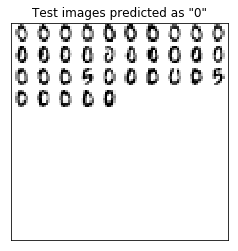

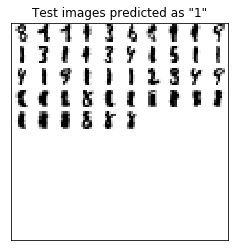

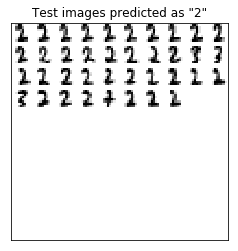

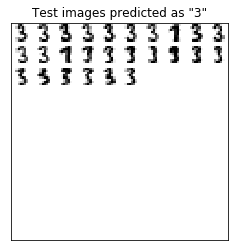

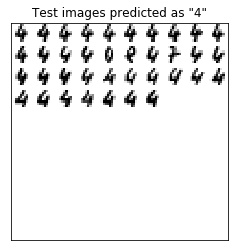

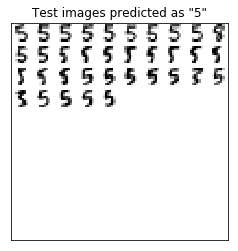

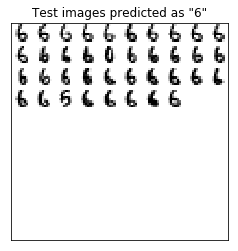

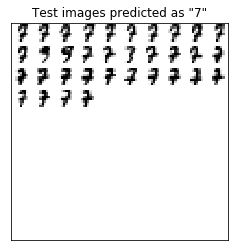

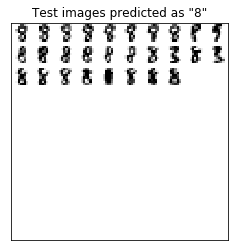

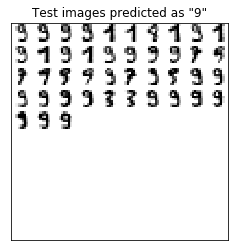

In [6]:
# Step 5: Visualize the classification results
for selected_class in range(0,10):
    x_visualize = x_test[y_pred == selected_class]
    # plot some images of the digits
    n_img_per_row = 10
    img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
    for i in range(n_img_per_row):
        ix = 10 * i + 1
        for j in range(n_img_per_row):
            iy = 10 * j + 1
            if i * n_img_per_row + j < len(x_visualize):
                img[ix:ix + 8, iy:iy + 8] = x_visualize[i * n_img_per_row + j].reshape((8, 8))
    plt.imshow(img, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.title('Test images predicted as "{:}"'.format(selected_class))
    plt.show()